In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

plt.style.use('ggplot')

In [2]:
# datetime
# season 1=봄, 2=여름, 3=가을, 4=겨울
# holyday 1=휴일
# workingday 1=주중
# weather 1=맑음, 2=안개, 3=가벼운눈,가벼운비, 4=심한눈/비 천둥/번개
# temp 
# atemp
# humidity
# windspeed
# casual 등록되지 않은사용자가 대여한횟수
# registered 등록된 사용자가 대여한 횟수
# count
train = pd.read_csv('bike.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [7]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [8]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [9]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [10]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [11]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [12]:
train['second'] = datetime.dt.second
train['second'].head()

0    0
1    0
2    0
3    0
4    0
Name: second, dtype: int64

In [13]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


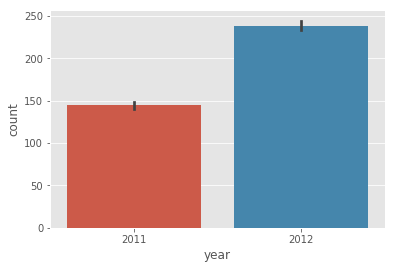

In [14]:
sns.barplot(data=train, x='year', y='count')

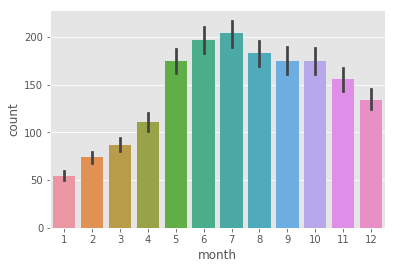

In [15]:
train11 = train[train['year']==2011]
train12 = train[train['year']==2012]
sns.barplot(data=train11, x='month', y='count')

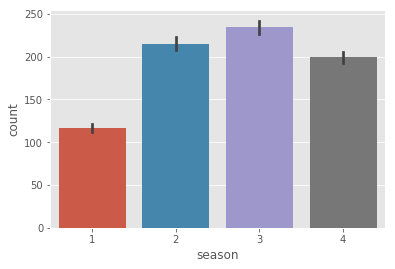

In [16]:
sns.barplot(data=train, x='season', y='count')

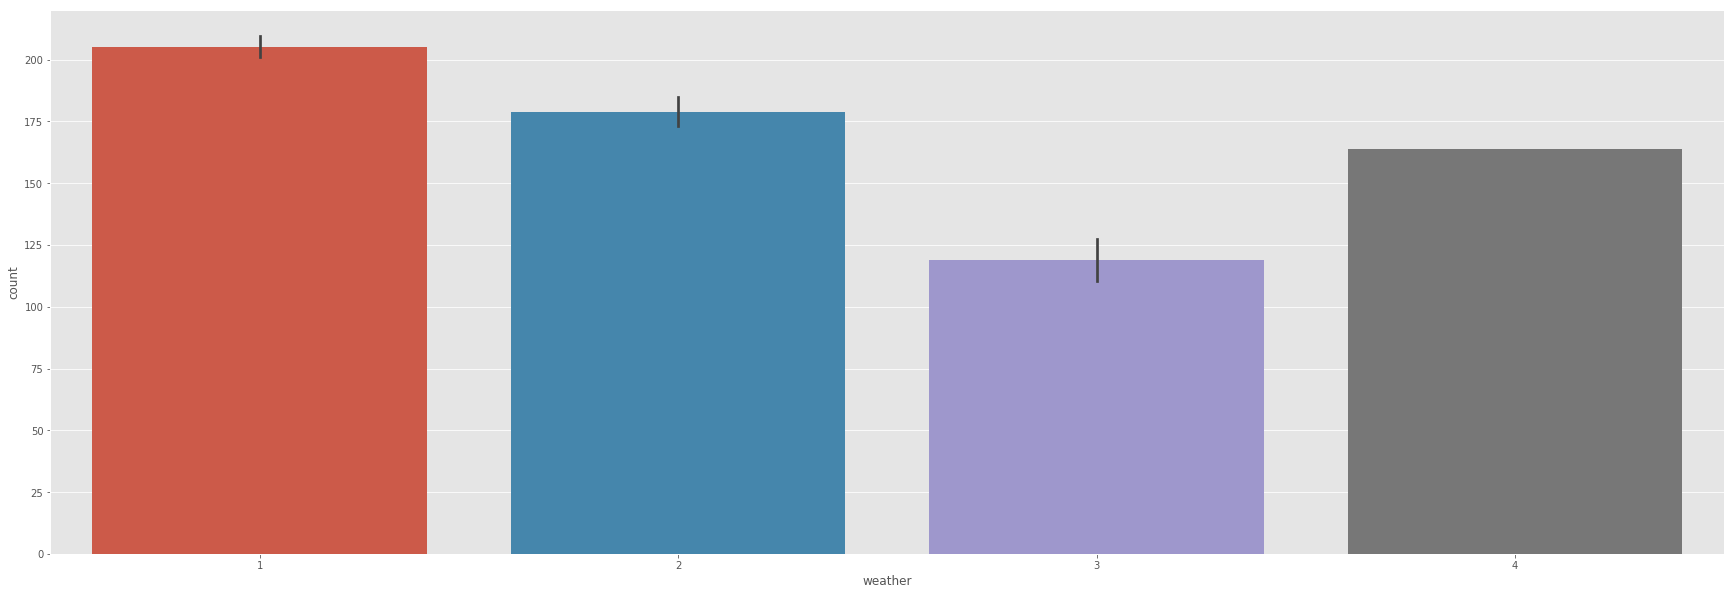

In [17]:
plt.figure(figsize=(30,10))
sns.barplot(data=train, x='weather', y='count')

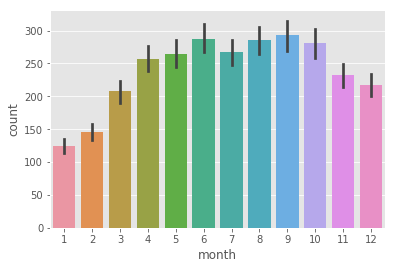

In [18]:
sns.barplot(data=train12, x='month', y='count')

In [19]:
train11[ train11['month']==3 ] ['temp'].mean()

14.06318385650224

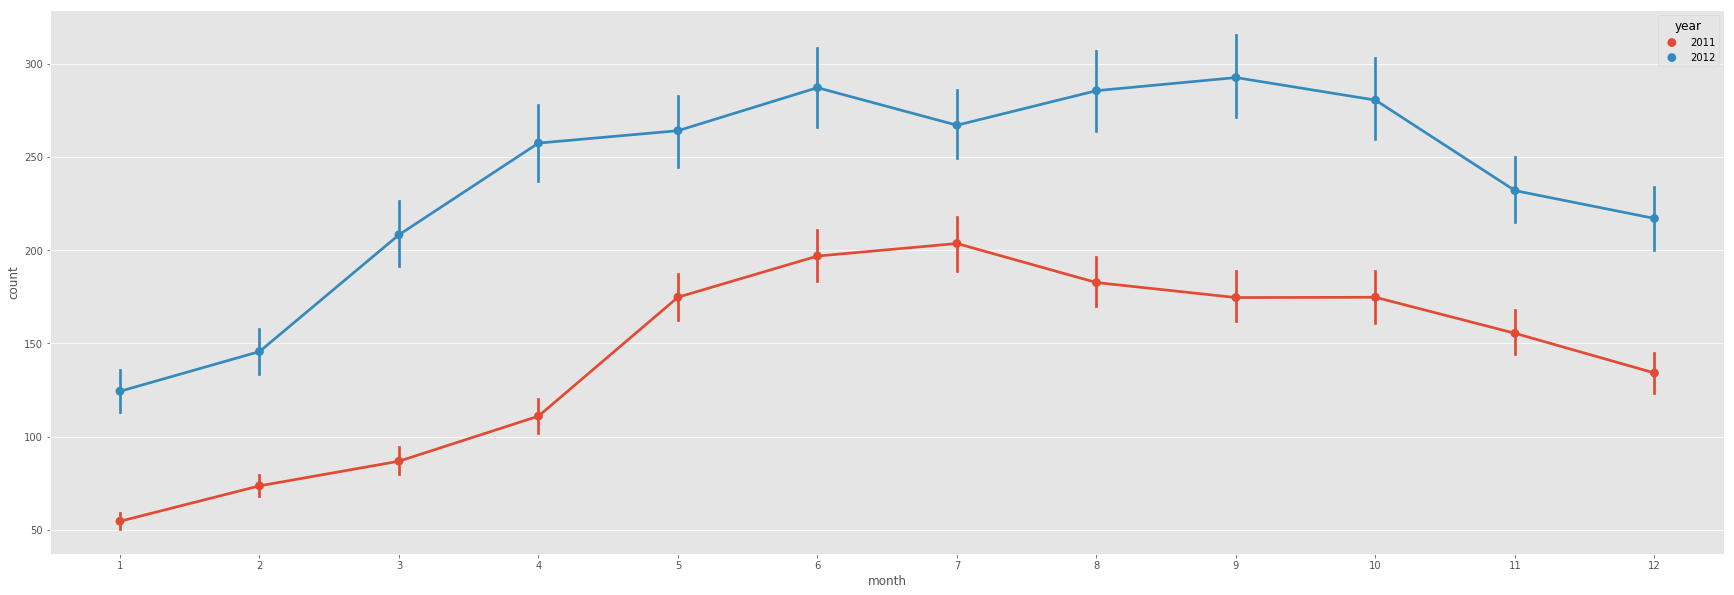

In [20]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='month', y='count', hue='year')

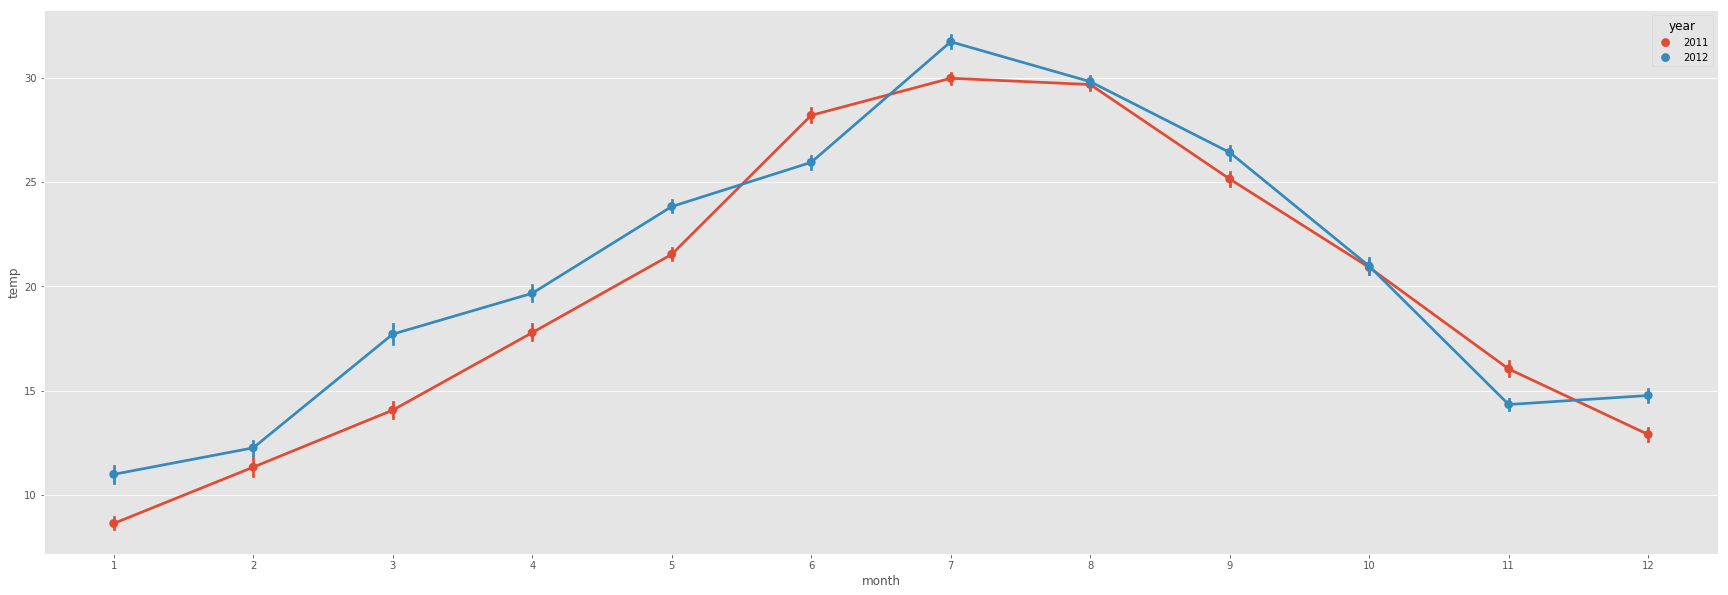

In [21]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='month', y='temp', hue='year')

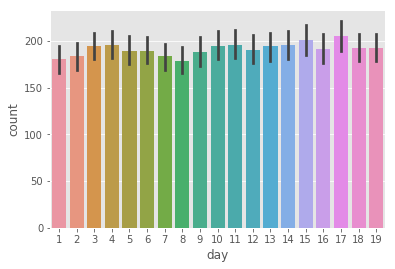

In [22]:
sns.barplot(data=train, x='day', y='count')

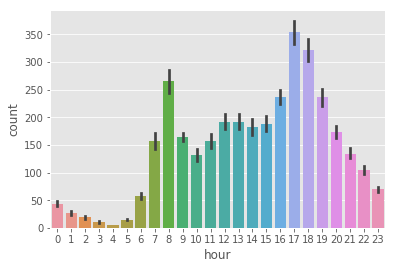

In [23]:
sns.barplot(data=train11, x='hour', y='count')

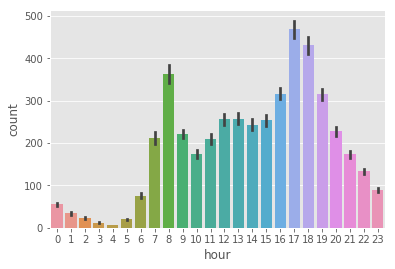

In [24]:
sns.barplot(data=train, x='hour', y='count')

In [25]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

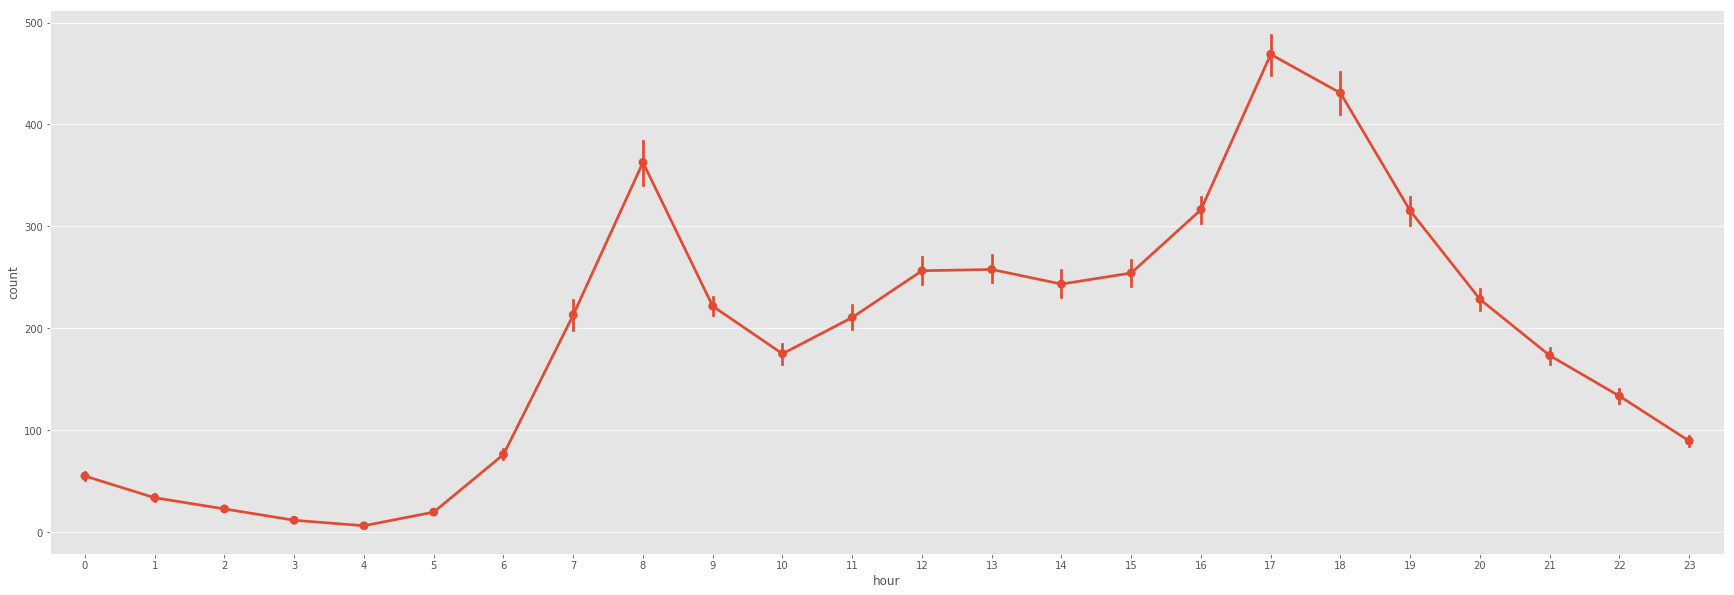

In [26]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count')

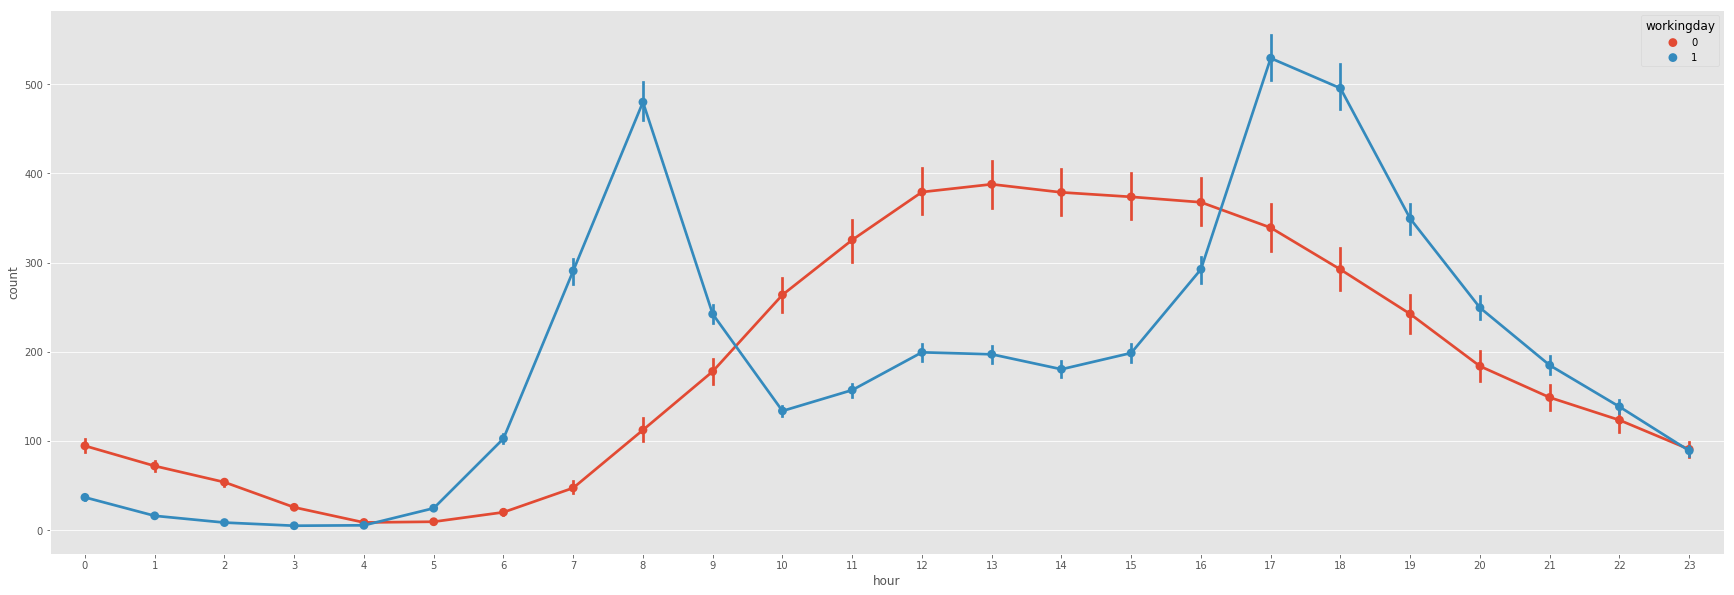

In [27]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='workingday')

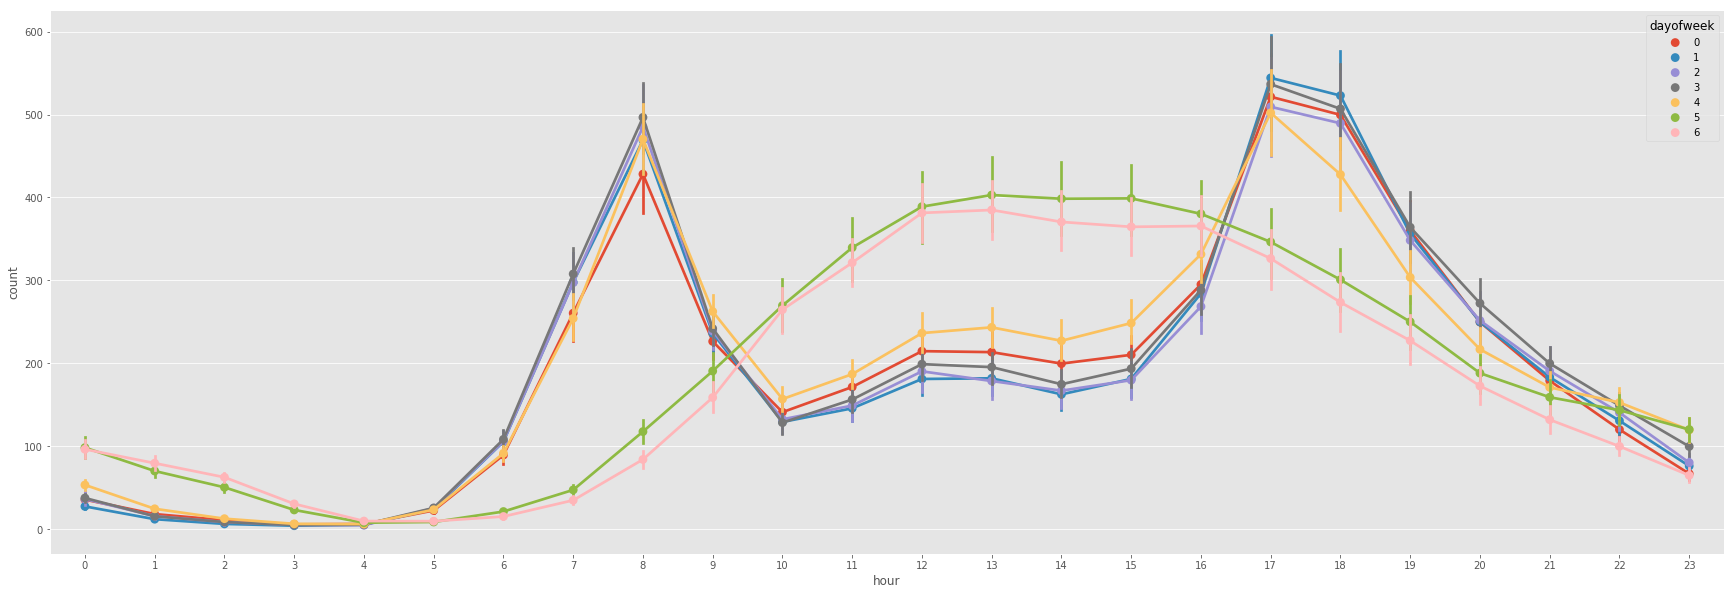

In [28]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek')

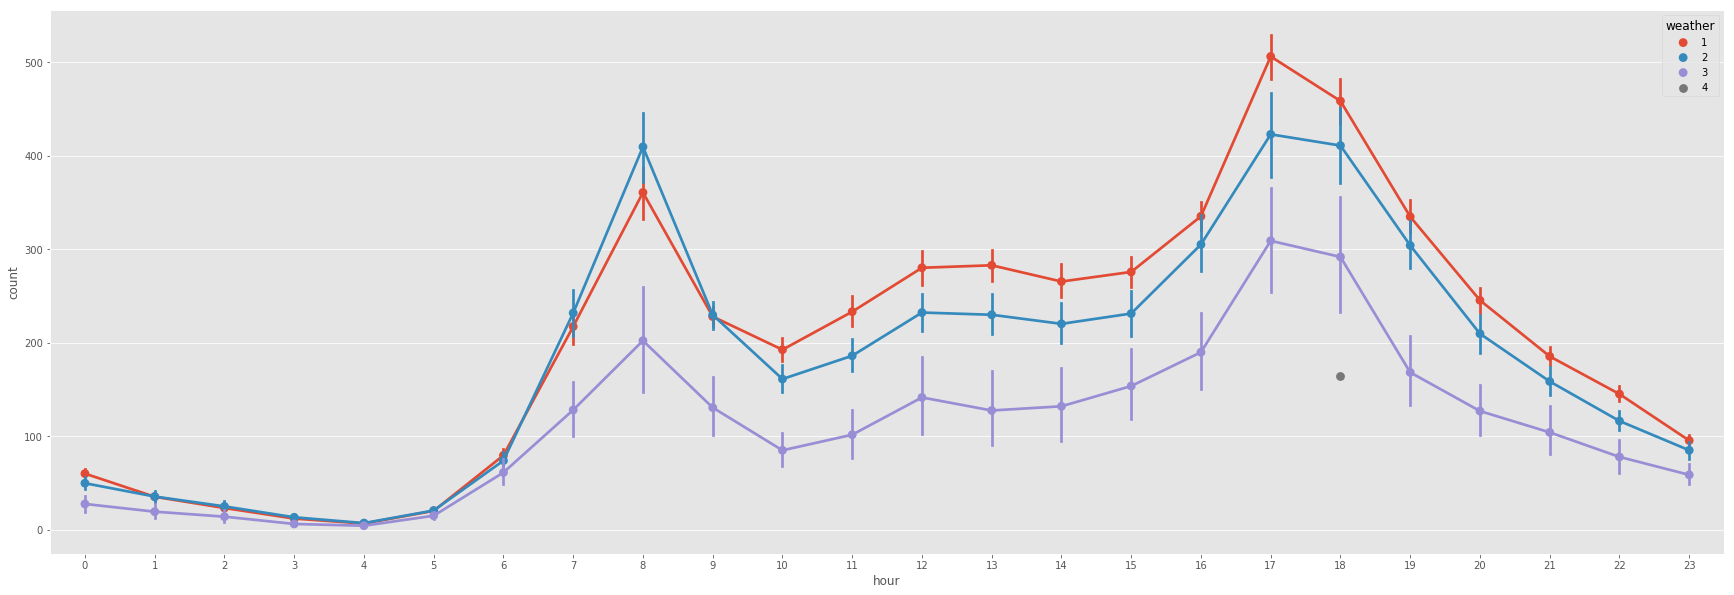

In [29]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='weather')

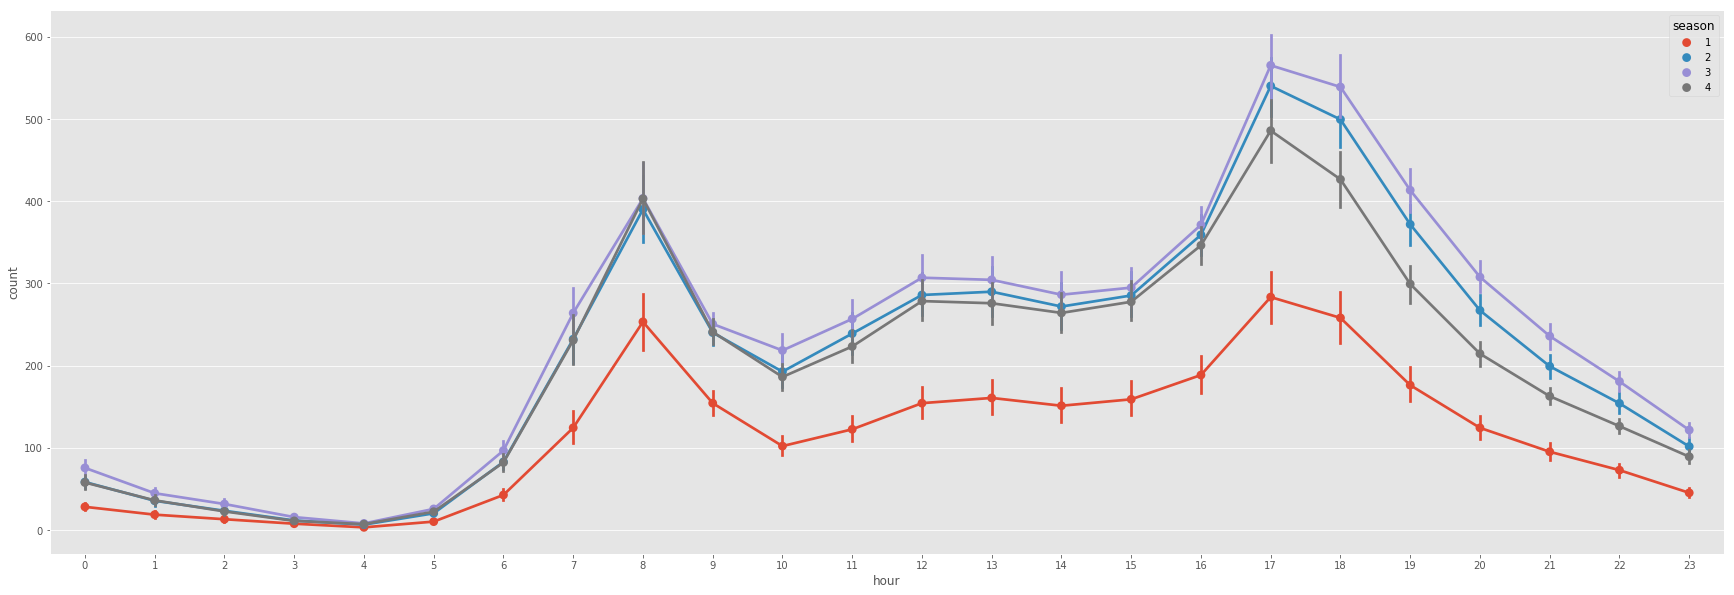

In [30]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='hour', y='count', hue='season')

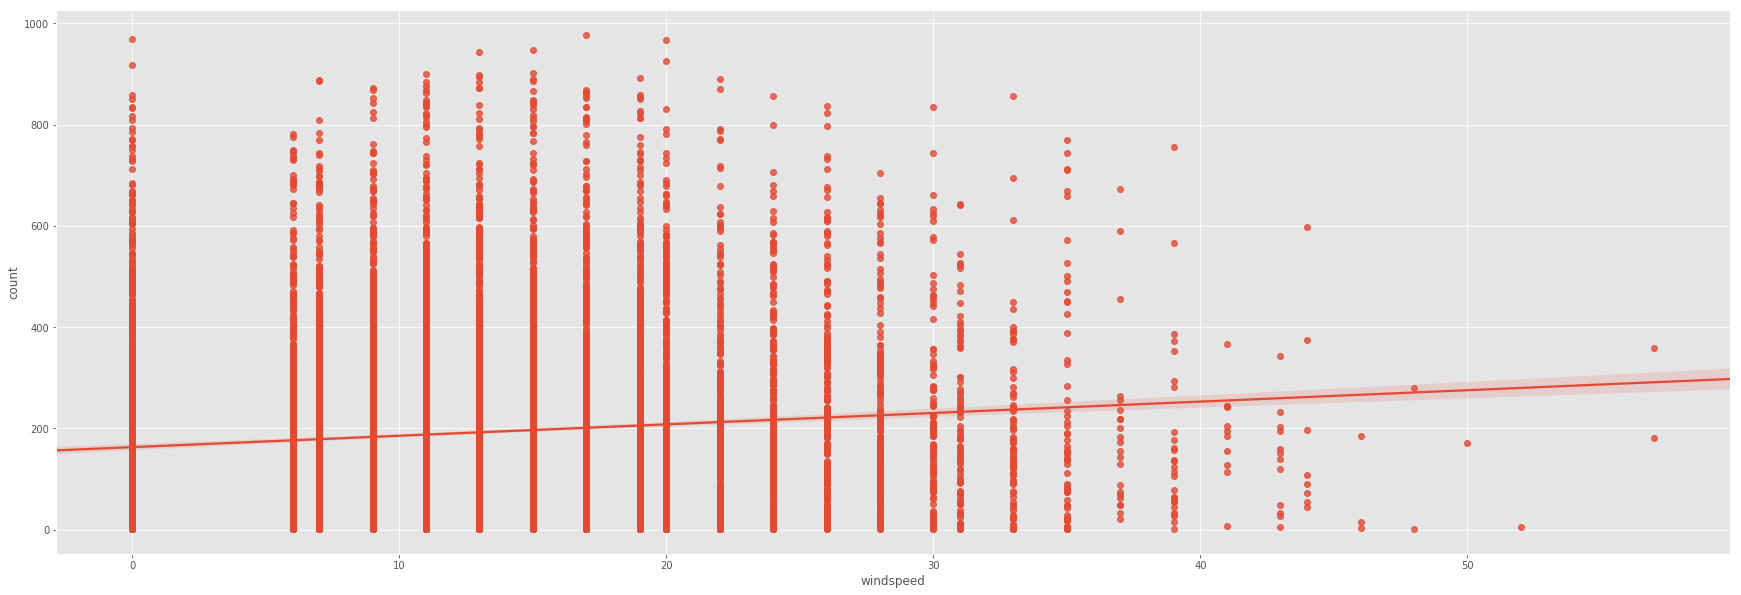

In [31]:
plt.figure(figsize=(30,10))

sns.regplot(data=train, x='windspeed', y='count')

In [32]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [33]:
train['season2'] = 0
train.loc[train['month']==1,'season2'] = 1
train.loc[train['month']==2,'season2'] = 1
train.loc[train['month']==3,'season2'] = 2
train.loc[train['month']==4,'season2'] = 2
train.loc[train['month']==5,'season2'] = 4
train.loc[train['month']==6,'season2'] = 4
train.loc[train['month']==7,'season2'] = 4
train.loc[train['month']==8,'season2'] = 4
train.loc[train['month']==9,'season2'] = 4
train.loc[train['month']==10,'season2'] = 4
train.loc[train['month']==11,'season2'] = 3
train.loc[train['month']==12,'season2'] = 3

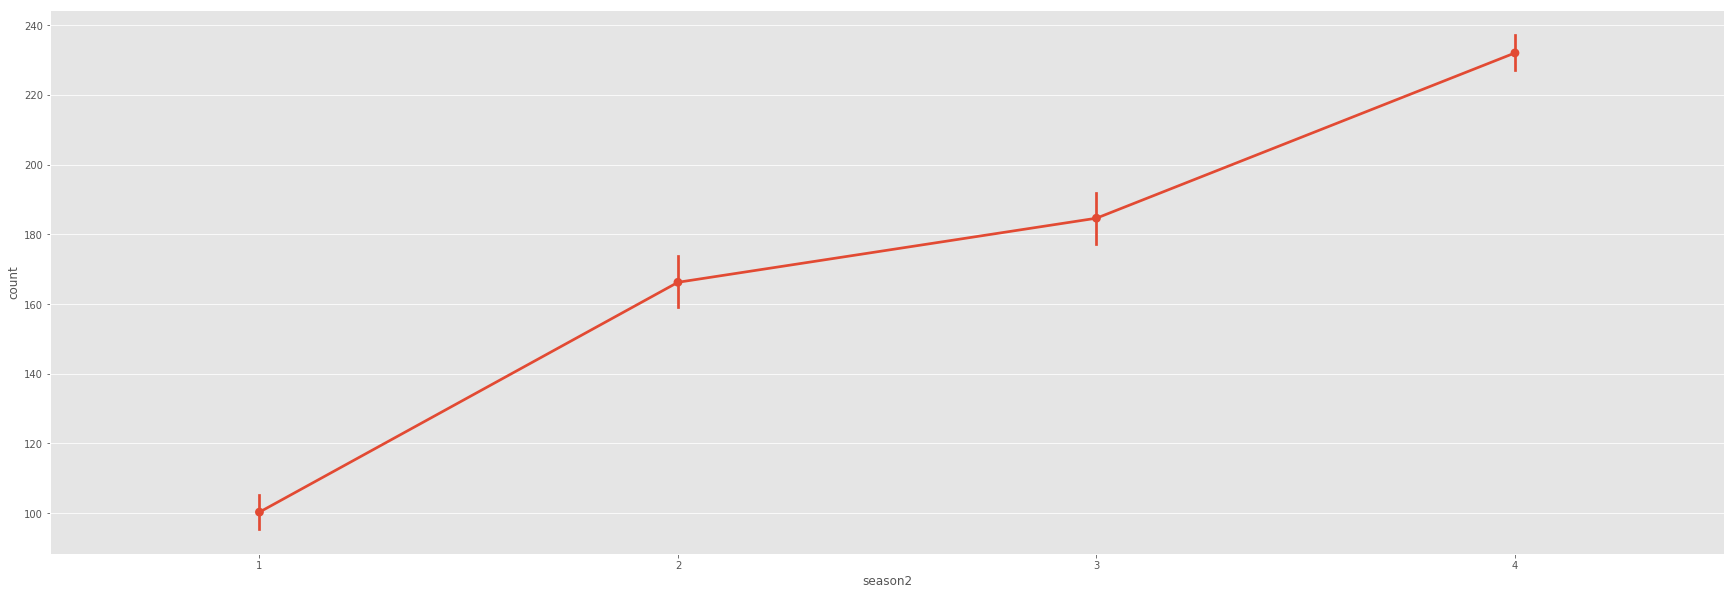

In [34]:
plt.figure(figsize=(30,10))

sns.pointplot(data=train, x='season2', y='count')

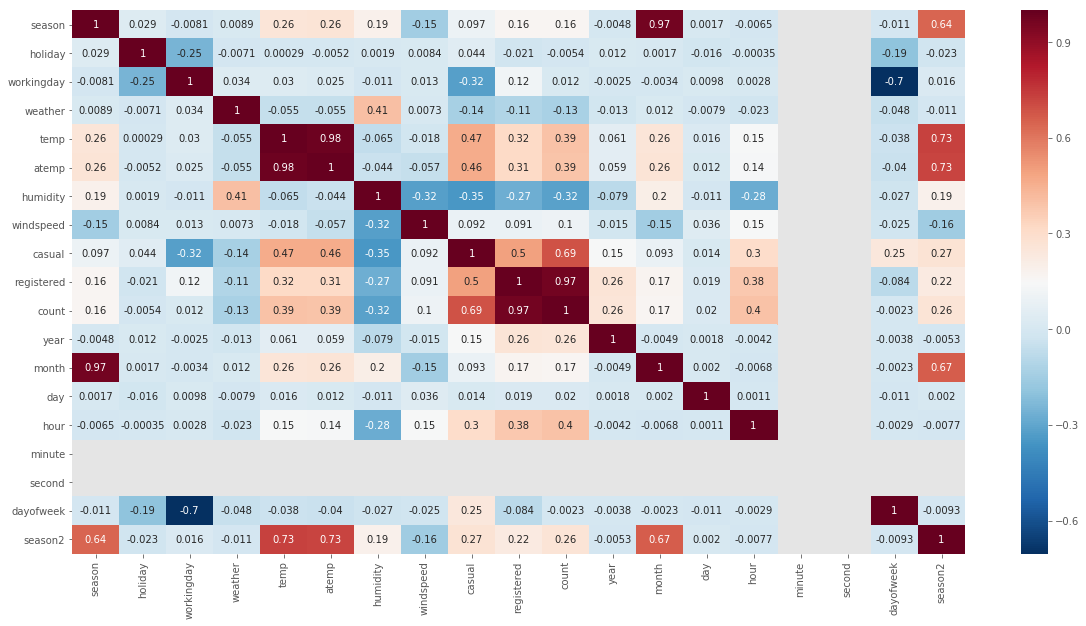

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

sns.heatmap(train.corr(), annot=True, cmap="RdBu_r")

In [36]:
q1 = np.percentile(train['count'], 25)
q3 = np.percentile(train['count'], 75)
IQR = q3 - q1
IQR

242.0

In [37]:
trainWithoutOutliers = train[(train['count'] >= q1-(1.5*IQR)) & (train['count'] <=(q3+1.5*IQR))]
print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10586, 20)


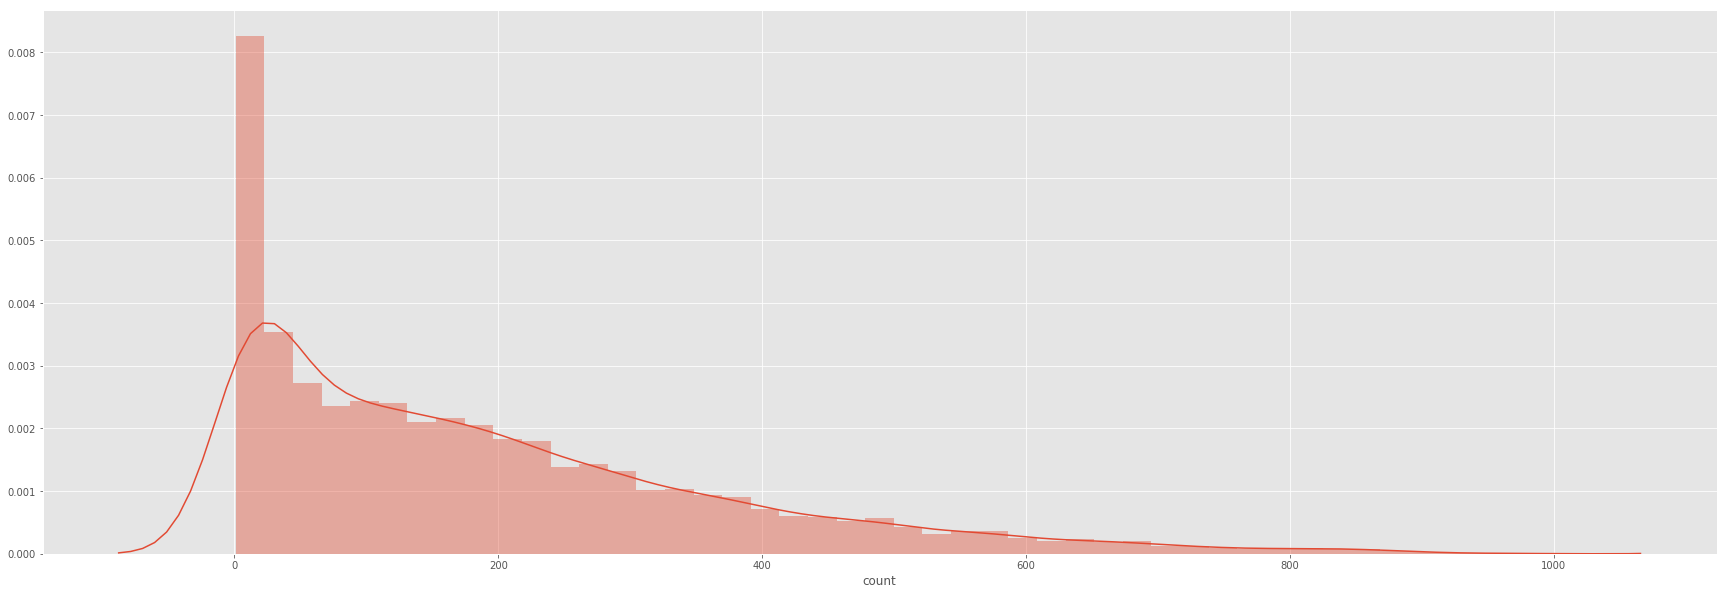

In [38]:
plt.figure(figsize=(30,10))
sns.distplot(train['count'])

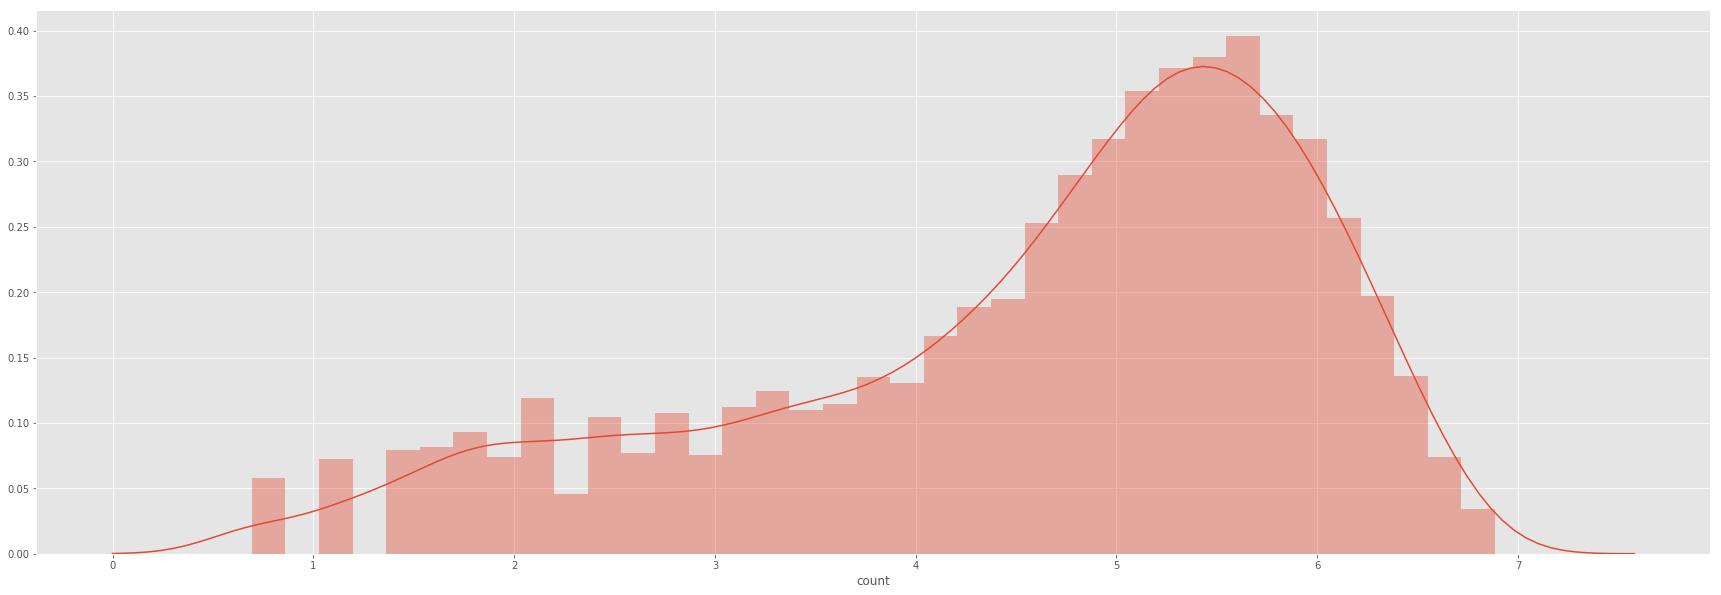

In [39]:
train['count'] = np.log1p(train['count'])

plt.figure(figsize=(30,10))
sns.distplot(train['count'])

In [40]:
y = train['count']
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
5        0.693147
6        1.098612
7        1.386294
8        2.197225
9        2.708050
10       3.610918
11       4.043051
12       4.442651
13       4.553877
14       4.672829
15       4.709530
16       4.543295
17       4.219508
18       3.583519
19       3.637586
20       3.610918
21       3.555348
22       3.367296
23       3.688879
24       2.890372
25       2.890372
26       2.302585
27       1.945910
28       1.386294
29       1.098612
           ...   
10856    6.265301
10857    5.869297
10858    5.594711
10859    5.129899
10860    4.890349
10861    4.406719
10862    3.737670
10863    2.772589
10864    1.386294
10865    1.791759
10866    2.079442
10867    3.465736
10868    4.727388
10869    5.897154
10870    6.520621
10871    5.762051
10872    5.105945
10873    5.303305
10874    5.468060
10875    5.365976
10876    5.389072
10877    5.472271
10878    5.814131
10879    6.333280
10880    6

In [41]:
X = train.copy()
X.pop('datetime')
X.pop('casual')
X.pop('registered')
X.pop('day')
X.pop('minute')
X.pop('second')
X.pop('count')
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,hour,dayofweek,season2
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,0,5,1
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,2,5,1
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,3,5,1
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,4,5,1


In [42]:
X.pop('windspeed')
X.pop('season')
X.pop('atemp')
X.pop('humidity')
X.pop('dayofweek')
X.pop('workingday')
X.head()

,holiday,weather,temp,year,month,hour,season2
0,0,1,9.84,2011,1,0,1
1,0,1,9.02,2011,1,1,1
2,0,1,9.02,2011,1,2,1
3,0,1,9.84,2011,1,3,1
4,0,1,9.84,2011,1,4,1


In [43]:
dummy = pd.get_dummies(X, columns=['hour', 'month', 'year', 'weather', 'holiday'])
dummy.head()
dummy.columns

Index(['temp', 'season2', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2011', 'year_2012', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummy, y, test_size=0.2)

In [45]:
from sklearn.linear_model import LinearRegression

IModel = LinearRegression()
IModel.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
pred=IModel.predict(X_train)

In [47]:
IModel.score(X_train, y_train)

0.8306365732384006

In [48]:
from sklearn.metrics import mean_squared_error
print('MSE: ', mean_squared_error(pred, y_train))

MSE:  0.3389697218451052


In [59]:
pred=IModel.predict(X_test)
print('MSE: ', mean_squared_error(pred, y_test))

MSE:  0.352682361457457


In [60]:
IModel.score(X_test, y_test)

0.8293875697461729

In [61]:
np.sqrt(mean_squared_error(pred, y_test))

0.5938706605460965

In [122]:
train = pd.read_csv('bike_test.csv')
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = datetime.dt.year
train['month'] = datetime.dt.month
train['day'] = datetime.dt.day
train['hour'] = datetime.dt.hour

train['season2'] = 0
train.loc[train['month']==1,'season2'] = 1
train.loc[train['month']==2,'season2'] = 1
train.loc[train['month']==3,'season2'] = 2
train.loc[train['month']==4,'season2'] = 2
train.loc[train['month']==5,'season2'] = 4
train.loc[train['month']==6,'season2'] = 4
train.loc[train['month']==7,'season2'] = 4
train.loc[train['month']==8,'season2'] = 4
train.loc[train['month']==9,'season2'] = 4
train.loc[train['month']==10,'season2'] = 4
train.loc[train['month']==11,'season2'] = 3
train.loc[train['month']==12,'season2'] = 3

X = train.copy()
X.pop('datetime')
X.pop('day')
X.pop('windspeed')
X.pop('season')
X.pop('atemp')
X.pop('humidity')
X.pop('workingday')
X.head()

,holiday,weather,temp,year,month,hour,season2
0,0,1,10.66,2011,1,0,1
1,0,1,10.66,2011,1,1,1
2,0,1,10.66,2011,1,2,1
3,0,1,10.66,2011,1,3,1
4,0,1,10.66,2011,1,4,1


In [123]:
dummy = pd.get_dummies(X, columns=['hour', 'month', 'year', 'weather', 'holiday'])
dummy.head()
dummy.columns

Index(['temp', 'season2', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2011', 'year_2012', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'holiday_0', 'holiday_1'],
      dtype='object')

In [124]:
back=IModel.predict(dummy)

In [79]:
#back = np.expm1(pred)

In [114]:
#sol = pd.DataFrame(back.astype('uint8'))

In [138]:
sol.columns = ['count']

In [131]:
back

array([2.8536377 , 2.25137329, 1.74824524, ..., 5.34529114, 5.74987793,
       5.65863037])

In [126]:
train = pd.read_csv('bike_test.csv')
train.pop("season")
train.pop("holiday")
train.pop("workingday")
train.pop("weather")
train.pop("temp")
train.pop("atemp")
train.pop("humidity")
train.pop("windspeed")
train.head()

,datetime
0,2011-01-20 00:00:00
1,2011-01-20 01:00:00
2,2011-01-20 02:00:00
3,2011-01-20 03:00:00
4,2011-01-20 04:00:00


In [139]:
p = pd.concat([train, pd.DataFrame(back)], axis=1)

In [140]:
p.to_csv("filename.csv", mode='w')

In [141]:
p = p.set_index("datetime")
p.to_csv("filename.csv", mode='w')

In [142]:
p

,0
datetime,
2011-01-20 00:00:00,2.853638
2011-01-20 01:00:00,2.251373
2011-01-20 02:00:00,1.748245
2011-01-20 03:00:00,1.257645
2011-01-20 04:00:00,0.961639
2011-01-20 05:00:00,1.909683
2011-01-20 06:00:00,3.069473
2011-01-20 07:00:00,4.032104
2011-01-20 08:00:00,4.686478
